In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 로드
df = pd.read_csv('C:/workspace/AI/data/서울시_통합/air_seoul.csv', encoding='CP949')

# 입력 변수 선택
features = ['PM25', 'CO', 'PM10']

# 데이터 전처리
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# 입력 시퀀스 생성
sequence_length = 700 # 입력 시퀀스 길이 
X = []
y = []
for i in range(len(df) - sequence_length):
    X.append(df[features].values[i:i+sequence_length])
    y.append(df['PM25'].values[i+sequence_length])
X = np.array(X)
y = np.array(y)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, len(features))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# 예측
y_pred = model.predict(X_test)



Epoch 1/50
29/29 [==============================] - 10s 279ms/step - loss: 0.0117 - val_loss: 0.0046
Epoch 2/50
29/29 [==============================] - 8s 266ms/step - loss: 0.0098 - val_loss: 0.0045
Epoch 3/50
29/29 [==============================] - 8s 265ms/step - loss: 0.0097 - val_loss: 0.0044
Epoch 4/50
29/29 [==============================] - 8s 261ms/step - loss: 0.0094 - val_loss: 0.0049
Epoch 5/50
29/29 [==============================] - 8s 267ms/step - loss: 0.0093 - val_loss: 0.0042
Epoch 6/50
29/29 [==============================] - 8s 268ms/step - loss: 0.0092 - val_loss: 0.0039
Epoch 7/50
29/29 [==============================] - 8s 269ms/step - loss: 0.0093 - val_loss: 0.0045
Epoch 8/50
29/29 [==============================] - 8s 267ms/step - loss: 0.0090 - val_loss: 0.0044
Epoch 9/50
29/29 [==============================] - 8s 268ms/step - loss: 0.0089 - val_loss: 0.0046
Epoch 10/50
29/29 [==============================] - 8s 268ms/step - loss: 0.0087 - val_loss: 0.004

* 여러가지 feature의 경우의 수로 학습해 보았을때 실제와 예측값의 차이나 평가 지표가 다양하게 나오는데 이 과정에서 신뢰도에 대한 부분은 같이 토의해봐야할것 같습니다

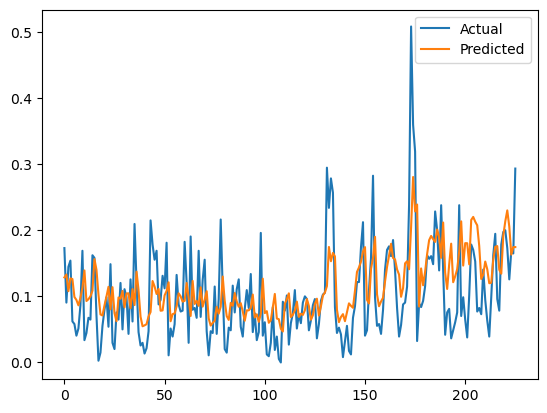

In [14]:
# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

* 예측 그래프와 실제 그래프를 비교해 보았을때 경향성은 꽤 잘 예측되는 편인것 같습니다

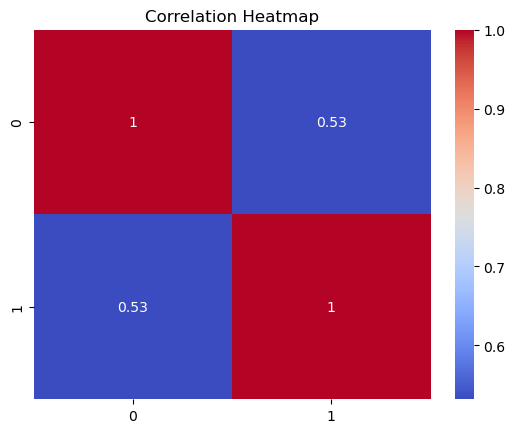

In [15]:
import seaborn as sns

# 상관관계 계산
correlation = np.corrcoef(y_test, y_pred.flatten())

# 히트맵 그리기
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* 예측값과 실제 값에 대한 상관분석을 해보았습니다

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

RMSE: 0.06225122754557219
MAE: 0.047729151030830426
R-squared: 0.23745068187670482


* 예측 성능을 평가해 보았습니다. RMSE와 MAE가 0에 가까울수록 R-squared가 1에 가까울 수록 예측의 정확도가 좋다고 평가 할 수 있다